In [2]:
pip install pandas

  Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl (11.3 MB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

  Using cached scikit_learn-1.4.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.13.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.2-cp312-cp312-macosx_12_0_arm64.whl (10.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.0-cp312-cp312-macosx_12_0_arm64.whl (30.4 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np

In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [14]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [15]:
X,y = mnist["data"],mnist["target"]

In [16]:
X.shape

(70000, 784)

In [17]:
y.shape

(70000,)

In [19]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 50.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


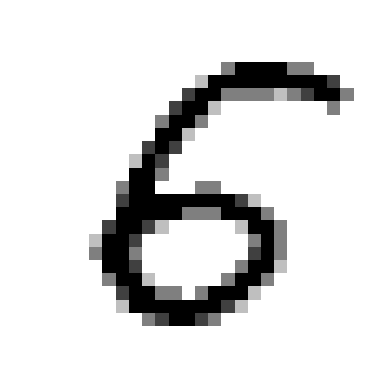

In [41]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[31000].values
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation = "nearest")
plt.axis("off")
plt.show()

In [42]:
print(y[31000])

6


In [90]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [91]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [92]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [93]:
# 5 detector as per the book - a binary classifier
y_train_5 = (y_train==5) # True for all 5s, False for other digits
y_test_5 = (y_test==5)

In [95]:
np.unique(y_test_5)

array([False,  True])

In [96]:
# using a Stochastic Gradient Descent 

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [152]:
sgd_clf.predict([some_digit])

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [115]:
#Implementing Cross-Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = (y_train_5.iloc[train_index])
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = (y_train_5.iloc[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9382
0.9667
0.9691


In [108]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9639 , 0.9368 , 0.96955])

In [111]:
train_index

array([    0,     1,     2, ..., 59995, 59996, 59997])

In [113]:
X_train.iloc[train_index]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [119]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90985, 0.90985, 0.90925])

In [ ]:
# So only about 10% values are 5 so even if all are guessed to be not 5, there is 90%+ accuracy :)

In [120]:
#Confusion Matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53257,  1322],
       [ 1273,  4148]])

In [ ]:
# True Negatives, False Positives
# False Negatives, True Positives

In [123]:
#Precision TP/TP+FP
#Recall TP/TP+FN  = Sensitivity or TPR True Positive Rate

In [125]:
from sklearn.metrics import precision_score, recall_score

In [132]:
precision_score(y_train_5, y_train_pred)

0.7583180987202925

In [127]:
recall_score(y_train_5, y_train_pred)

0.7651724774026932

In [140]:
#F1 Score Computation
# 2* (Precision*Recall)/(Precision+Recall)

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7617298686989257

In [ ]:
# F1 Score favors classifiers with similar Precision and Recall
# Precision/Recall Tradeoff - Increasing Precision reduces Recall and vice versa

In [141]:
# scikit-learn does not allow thresholds to be set directly, but allows access to the decision trees used to make predictions


In [142]:
y_scores = sgd_clf.decision_function([some_digit])

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [143]:
y_scores

array([2035.4347745])

In [144]:
threshold=0

In [145]:
y_some_digit_pred = (y_scores>threshold)

In [146]:
#SGD uses a threshold =0, so the above is same as no argument to SGD, so now we set a threshold
threshold = 200000
y_some_digit_pred = (y_scores >threshold)
y_some_digit_pred

array([False])

In [147]:
# How to use the threshold?
# get scores of all instances in the training set using cross_val_predict()

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")

In [148]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds  = precision_recall_curve(y_train_5, y_scores)

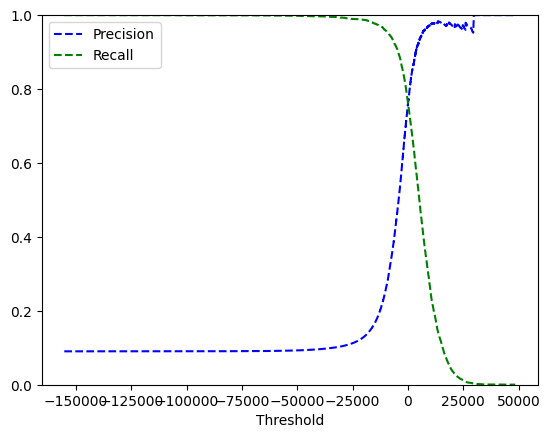

In [149]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label="Precision")
    plt.plot(thresholds, recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [150]:
# Here one can select the decision threshold based on the task they are working on.

In [159]:
#Say, for ex: here we take threshold of 70000
y_train_pred_90 = (y_scores>5000)
precision_score(y_train_5, y_train_pred_90)

0.9268947015425889

In [160]:
# Recall Score at the same threshold
recall_score(y_train_5, y_train_pred_90)

0.5098690278546394

In [162]:
# The ROC (Receiver Operating Characteristic) Curve
# This plots the TPR (Recall) against the FPR False Positive Rate
# FPR is also equal to 1-TNR True Negative Rate
# TNR = Specificity
# Hence ROC curve plots, Sensitivity(Recall) vs 1-specificity

In [163]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

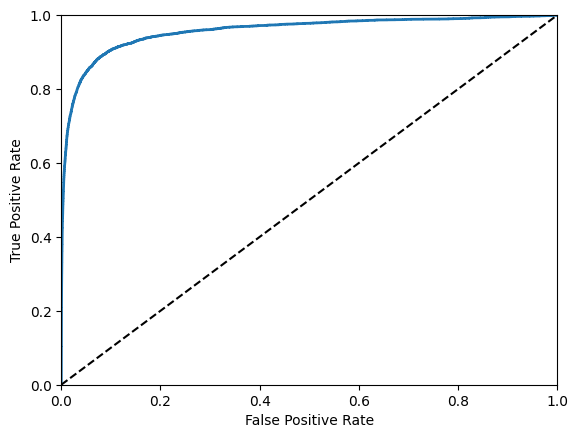

In [164]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1, 0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [165]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9574567119915219

In [167]:
# when the positive class is rare it is preferred to use the PR (Precision-Recall) curve,
# i.e., also when we care about the False positives more than the FN.

In [168]:
# No let's train a RandomForestClassifier
# RFC does not have a decision function, rather it has a predict_proba() function method

In [170]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [171]:
#For an ROC curvem scores are requiredm not probabilities, so we convert the y_probas_forest
y_scores_forest = y_probas_forest[:,1] # score = proba of positive class
fpr_forest, tpr_forest, threshold_forest = roc_curve (y_train_5, y_scores_forest)

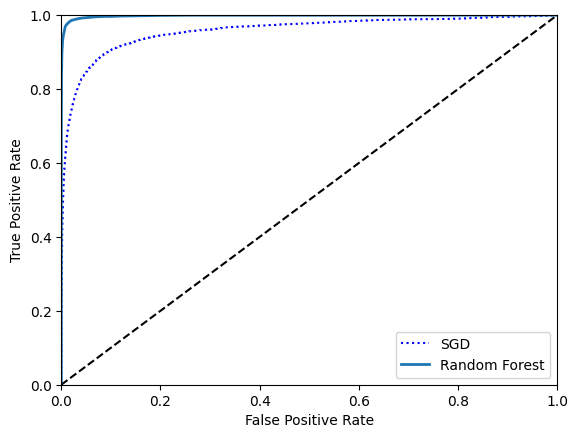

In [176]:
# Now we plot
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [182]:
roc_auc_score(y_train_5, y_scores_forest)

0.998284867448713

In [188]:
precision_score(y_train_5, y_scores_forest>0.5)

0.9899434318038969

In [189]:
recall_score(y_train_5, y_scores_forest>0.5)

0.8716104039845047

In [181]:
y_train_5

59910    False
22797    False
32389    False
17950    False
18853    False
         ...  
22723    False
10301    False
28608     True
49396    False
58195    False
Name: class, Length: 60000, dtype: bool

In [185]:
len(threshold_forest)

101

Multiclass Classification

In [193]:
sgd_clf.fit(X_train.values, y_train) #y_train, not y_train_5

SGDClassifier(random_state=42)

In [194]:
sgd_clf.predict([some_digit])

array([5])

In [196]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-12217.8859895 , -18283.06316005, -11435.54103854,
        -10343.61912708,  -8848.46547623,   7028.47853794,
         -3017.44081738, -63337.82292497,  -7776.78972424,
        -25029.7825467 ]])

In [198]:
np.argmax(some_digit_scores)

5

In [199]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [201]:
sgd_clf.classes_[5]

5

In [202]:
# To force Scikit-learn to use One-vesus-one or one-versus-all use OneVsOneClassifier or OneVsRestClassifier


In [213]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train.values, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [ ]:
ovo_clf.predict([some_digit])

In [205]:
len(ovo_clf.estimators_)

45

In [209]:
forest_clf.fit(X_train.values, y_train)

RandomForestClassifier(random_state=42)

In [208]:
forest_clf.predict([some_digit])

array([6])

In [214]:
forest_clf.predict_proba([some_digit])

array([[0.02, 0.  , 0.  , 0.  , 0.  , 0.16, 0.81, 0.  , 0.01, 0.  ]])

In [215]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87265, 0.8382 , 0.86345])

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [222]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9037 , 0.89895, 0.9058 ])

In [223]:
#Error Analysis

In [224]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5595,    0,   15,    9,   10,   49,   35,    7,  202,    1],
       [   1, 6418,   45,   23,    3,   47,    5,    8,  180,   12],
       [  27,   28, 5279,   83,   75,   24,   69,   42,  324,    7],
       [  28,   14,  120, 5262,    3,  225,   25,   41,  346,   67],
       [  10,   15,   49,   11, 5215,   11,   40,   23,  305,  163],
       [  31,   19,   28,  161,   56, 4532,   72,   21,  434,   67],
       [  29,   19,   41,    1,   39,  106, 5555,    7,  121,    0],
       [  20,   10,   56,   28,   53,    9,    6, 5719,  157,  207],
       [  17,   61,   41,   90,    3,  135,   27,    8, 5418,   51],
       [  20,   18,   31,   68,  123,   38,    1,  163,  311, 5176]])

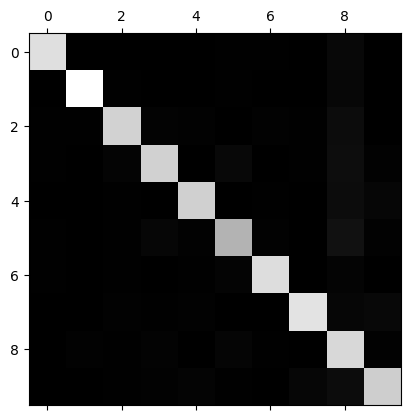

In [225]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [226]:
#the above confusion matrix seems fairly good, most images are on the main diagonal
#which means they are classified correctly.
# 5s look slightly darker, could be due to
# 1. fewer images of 5 are in the dataset
# 2. classifier does not perform well for 5

In [227]:
#Let's check
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums

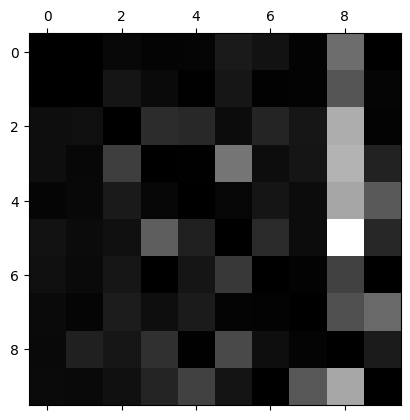

In [228]:
#Let's fill the diagonal with zeros to keep only the errors and plot
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [229]:
# The above graph shows what all errors the classifier is making
# mistaking 8 and 0
# an extra step to analyze no of loops a number has 8 has2, 6 has 1, 5 has none can be added

#Here we will compare individual error between 3 and 5

In [241]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):\n",
    n_rows = (len(instances) - 1) // images_per_row + 1
    # Append empty images to fill the end of the grid, if needed:\n",
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),\n",
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we\n",
    # want to combine next to each other, using transpose(), and only then we\n",
    # can reshape
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = matplotlib.cm.binary, **options)

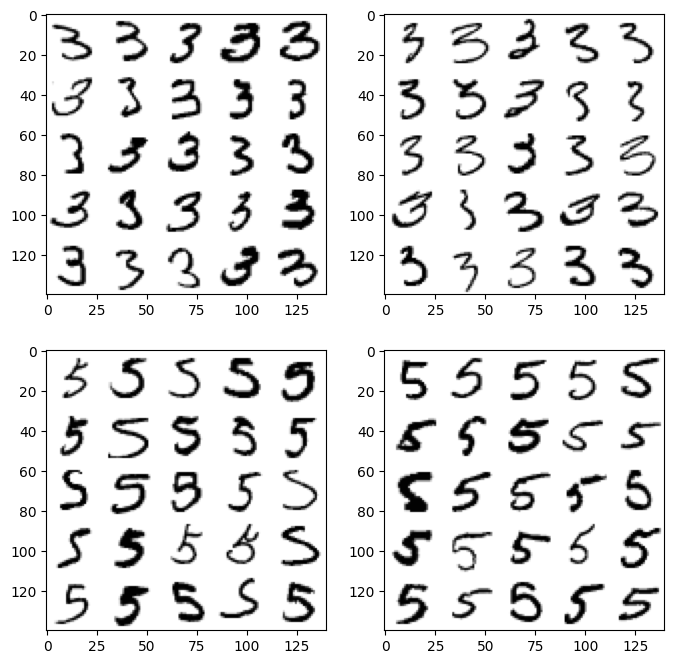

In [242]:
cl_a, cl_b =3,5
X_aa = X_train[(y_train==cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

In [243]:
# A lot of misclassification happens between 3 and 5 due to that shift in the small middle line.
# This can be fixed by doing some preprcessing, also the rotation plays a key role here
# Rotatoin can decide where that small line would come in the picture


# Multilabel Classification
# Situation : the classification is not bound to put a single label to each test image
# It can say if it thinks the output is multiple options


In [246]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)
y_train_odd = (y_train %2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train.values, y_multilabel)

KNeighborsClassifier()

In [247]:
knn_clf.predict([some_digit])

array([[False, False]])

In [248]:
# Approaches to get the right evaluation
# Take F1 score average across all labels
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average = "macro")

0.9687983247923835

In [249]:
# The above gives equal weight to each label
# you may want to give weight based on the number of instances with the target label
# Simply set average = "weighted"
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average = "weighted")

0.9689244506516683

# Multioutput Classification
# Multioutput - Multiclass Classification

In [253]:
# Generalization of Multiclass such that each label can have multiple classes
# To test out we add noise to the MNIST dataset

noise_train = np.random.randint(0, 100, (len(X_train), 784))
noise_test = np.random.randint(0, 100, (len(X_test),784))
X_train_mod = X_train + noise_train
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

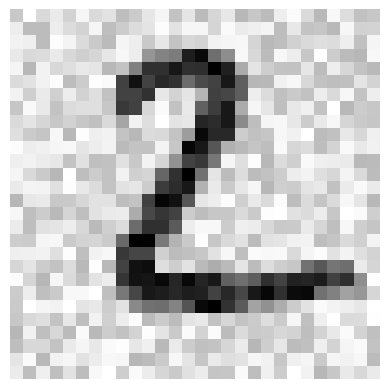

In [263]:
 def plot_digit(data):
     image = data.reshape(28, 28)
     plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
     plt.axis("off")

plot_digit(X_test_mod.iloc[1].values)

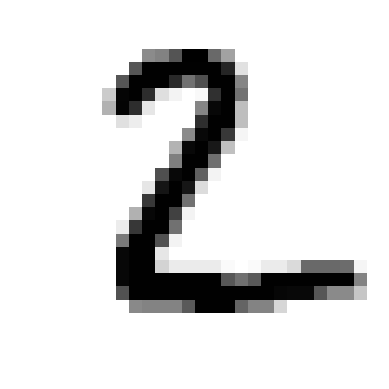

In [264]:
plot_digit(X_test.iloc[1].values)

In [267]:
# First is the noisy one and the second is our orifinal image
# Lest train the classifier and make it clean

knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[1]])

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


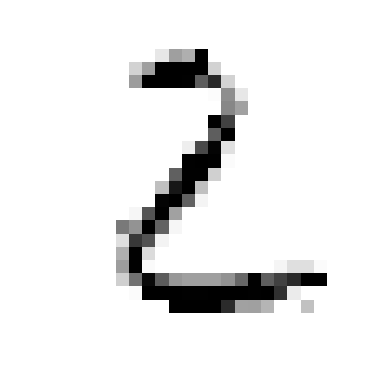

In [268]:
plot_digit(clean_digit)